In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
np.random.seed(100)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_0_20170117180013541.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_1_20170117153641469.jpg.c

In [9]:
import tensorflow as tf
import pathlib
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Using the UTKFace dataset for age and gender detection

In [10]:
path_utk = '../input/utkface-new'
path_face_cropped = '../input/utkface-new/crop_part1'


path_face_cropped = pathlib.Path(path_face_cropped)
print(path_face_cropped)
print(len(str(path_face_cropped)))

image_count = len(list(path_face_cropped.glob('*.jpg')))
print(image_count)

../input/utkface-new/crop_part1
31
9780


../input/utkface-new/crop_part1/21_1_3_20170105003215901.jpg.chip.jpg


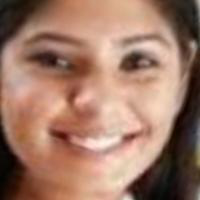

In [11]:
faces = list(path_face_cropped.glob('*.jpg'))
print(faces[1])
img1 = PIL.Image.open(str(faces[1]))
img1

In [12]:
batch = 32
img_height = 210
img_width = 210

# Data Preprocessing for age detection model

Age ranges:<br>
1. 0-20
2. 21-40
3. 41-60
4. 61-80
5. 81-116

In [13]:
age_class=['0-20','21-40','41-60','61-80','81-116']

## Creating a csv file for the images and their labels

In [14]:
df = pd.DataFrame(columns=['images','age','gender'])
for img in faces:
    new_img = str(img)
    img = new_img.split("/")
    #print(img)
    img_name = img[4]
    img = img_name.split("_")
    #print(img)
    #Making 0 and 1 into male and female to make it more interpretable
    if img[1] == '0':
        img[1] = 'male'
    else:
        img[1] = 'female'
    #Making the age label into age ranges instead
    img[0] = int(img[0])
#     if int(img[0]) > 100:
#         img[0] = '101-116'
    if img[0] >80:
        img[0] = '81-116'
    elif img[0] > 60:
        img[0] = '61-80'
    elif img[0] > 40:
        img[0] = '41-60'
    elif img[0] > 20:
        img[0] = '21-40'
    else:
        img[0] = '0-20'    
    df2 = {'images':new_img,'age':img[0],'gender':img[1]}
    df = df.append(df2,ignore_index=True)
df

images    age  gender
0     ../input/utkface-new/crop_part1/26_0_2_2017010...  21-40    male
1     ../input/utkface-new/crop_part1/21_1_3_2017010...  21-40  female
2     ../input/utkface-new/crop_part1/17_1_4_2017010...   0-20  female
3     ../input/utkface-new/crop_part1/76_0_0_2017010...  61-80    male
4     ../input/utkface-new/crop_part1/18_1_0_2017010...   0-20  female
...                                                 ...    ...     ...
9775  ../input/utkface-new/crop_part1/26_1_0_2017011...  21-40  female
9776  ../input/utkface-new/crop_part1/66_0_0_2017010...  61-80    male
9777  ../input/utkface-new/crop_part1/41_0_0_2017010...  41-60    male
9778  ../input/utkface-new/crop_part1/2_0_2_20161219...   0-20    male
9779  ../input/utkface-new/crop_part1/65_1_0_2017011...  61-80  female

[9780 rows x 3 columns]

In [15]:
df_data = df.images
y_data = df.age
y2_data = df.gender
X_train, X_test, y_train, y_test = train_test_split(df_data, y_data, test_size=0.2)

In [16]:
type(X_train)

pandas.core.series.Series

In [17]:
d = {'images':X_train,'age':y_train}
df_train = pd.concat(d,axis=1)
df_train.images

9777    ../input/utkface-new/crop_part1/41_0_0_2017010...
121     ../input/utkface-new/crop_part1/26_1_0_2017010...
5918    ../input/utkface-new/crop_part1/2_1_3_20161219...
3617    ../input/utkface-new/crop_part1/12_1_0_2017010...
5458    ../input/utkface-new/crop_part1/1_0_4_20161221...
                              ...                        
350     ../input/utkface-new/crop_part1/52_1_0_2017011...
79      ../input/utkface-new/crop_part1/4_1_3_20161220...
8039    ../input/utkface-new/crop_part1/1_1_2_20161219...
6936    ../input/utkface-new/crop_part1/3_1_3_20161220...
5640    ../input/utkface-new/crop_part1/2_0_2_20161219...
Name: images, Length: 7824, dtype: object

In [18]:
df_data = df_train.images
y_data = df_train.age
y2_data = df.gender
X_train, X_val, y_train, y_val = train_test_split(df_data, y_data, test_size=0.2)

In [19]:
d = {'images':X_train,'age':y_train}
train = pd.concat(d,axis=1)
train

images    age
6698  ../input/utkface-new/crop_part1/30_0_3_2017010...  21-40
2500  ../input/utkface-new/crop_part1/31_1_2_2017010...  21-40
8135  ../input/utkface-new/crop_part1/6_0_2_20161219...   0-20
7886  ../input/utkface-new/crop_part1/62_0_0_2017011...  61-80
2171  ../input/utkface-new/crop_part1/12_0_4_2017010...   0-20
...                                                 ...    ...
8499  ../input/utkface-new/crop_part1/1_1_4_20170103...   0-20
154   ../input/utkface-new/crop_part1/32_1_3_2017010...  21-40
4236  ../input/utkface-new/crop_part1/1_0_2_20161219...   0-20
9210  ../input/utkface-new/crop_part1/17_0_3_2017010...   0-20
2526  ../input/utkface-new/crop_part1/2_1_2_20161219...   0-20

[6259 rows x 2 columns]

In [20]:
train['age'].value_counts()

0-20      2704
21-40     1646
41-60     1073
61-80      620
81-116     216
Name: age, dtype: int64

In [21]:
d = {'images':X_val,'age':y_val}
val = pd.concat(d,axis=1)
val

images    age
3196  ../input/utkface-new/crop_part1/52_0_0_2017010...  41-60
783   ../input/utkface-new/crop_part1/13_0_0_2017010...   0-20
6129  ../input/utkface-new/crop_part1/57_0_0_2017010...  41-60
3574  ../input/utkface-new/crop_part1/65_1_0_2017011...  61-80
1082  ../input/utkface-new/crop_part1/18_1_0_2017010...   0-20
...                                                 ...    ...
6187  ../input/utkface-new/crop_part1/1_1_0_20161219...   0-20
9061  ../input/utkface-new/crop_part1/11_1_4_2017010...   0-20
4009  ../input/utkface-new/crop_part1/64_0_0_2017010...  61-80
3761  ../input/utkface-new/crop_part1/43_0_4_2017010...  41-60
8189  ../input/utkface-new/crop_part1/3_0_0_20170109...   0-20

[1565 rows x 2 columns]

In [22]:
d = {'images':X_test,'age':y_test}
df_test = pd.concat(d,axis=1)
df_test

images    age
991   ../input/utkface-new/crop_part1/1_0_0_20170110...   0-20
5797  ../input/utkface-new/crop_part1/3_1_4_20161221...   0-20
5077  ../input/utkface-new/crop_part1/46_0_4_2017010...  41-60
9136  ../input/utkface-new/crop_part1/58_1_3_2017010...  41-60
2215  ../input/utkface-new/crop_part1/1_0_2_20161219...   0-20
...                                                 ...    ...
4328  ../input/utkface-new/crop_part1/42_0_0_2017010...  41-60
6509  ../input/utkface-new/crop_part1/5_0_0_20170110...   0-20
8225  ../input/utkface-new/crop_part1/1_1_0_20170109...   0-20
2277  ../input/utkface-new/crop_part1/49_1_0_2017010...  41-60
8165  ../input/utkface-new/crop_part1/73_0_0_2017011...  61-80

[1956 rows x 2 columns]

In [23]:
train_gen = ImageDataGenerator(#rotation_range=45,
                               rescale=1./255#,
                               #horizontal_flip=True
)
test_gen = ImageDataGenerator(rescale = 1./255)

In [24]:
train_data = train_gen.flow_from_dataframe(dataframe = train, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'age', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="sparse",
                                           target_size = (img_height,img_width))

test_data = test_gen.flow_from_dataframe(dataframe = df_test,
                                         #directory = test_folder,
                                         x_col = 'images',
                                         y_col = 'age',
                                         batch_size = batch,
                                         shuffle = True,
                                         class_mode='sparse',
                                         target_size = (img_height,img_width))

val_data = train_gen.flow_from_dataframe(dataframe = val, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'age', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="sparse",
                                           target_size = (img_height,img_width))

Found 6259 validated image filenames belonging to 5 classes.
Found 1956 validated image filenames belonging to 5 classes.
Found 1565 validated image filenames belonging to 5 classes.


In [25]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
conv_layer_32 = layers.Conv2D(32,(3,3),activation='relu')
conv_layer_64 = layers.Conv2D(64,3,activation='relu')
conv_layer_16 = layers.Conv2D(16,3,activation='relu')
max_pool = layers.MaxPooling2D()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [26]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 210, 210, 3)
(32,)


In [27]:
for image_batch, labels_batch in val_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 210, 210, 3)
(32,)


# Age Detection Model

In [28]:
num_classes = 5

model = tf.keras.Sequential([
  normalization_layer,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  #
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  #  
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  #layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [29]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [30]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs= 10,
    callbacks = callback,
    shuffle=False
)
eff_epochs = len(history.history['loss'])

Epoch 1/10
196/196 [==============================] - 45s 229ms/step - loss: 1.3126 - accuracy: 0.4346 - val_loss: 1.0877 - val_accuracy: 0.5419
Epoch 2/10
196/196 [==============================] - 16s 82ms/step - loss: 1.0313 - accuracy: 0.5771 - val_loss: 0.9288 - val_accuracy: 0.6153
Epoch 3/10
196/196 [==============================] - 17s 85ms/step - loss: 0.9322 - accuracy: 0.6140 - val_loss: 0.8998 - val_accuracy: 0.6230
Epoch 4/10
196/196 [==============================] - 16s 80ms/step - loss: 0.8891 - accuracy: 0.6263 - val_loss: 0.8955 - val_accuracy: 0.6160
Epoch 5/10
196/196 [==============================] - 16s 80ms/step - loss: 0.8584 - accuracy: 0.6463 - val_loss: 0.8564 - val_accuracy: 0.6390
Epoch 6/10
196/196 [==============================] - 18s 94ms/step - loss: 0.8282 - accuracy: 0.6594 - val_loss: 0.8427 - val_accuracy: 0.6396
Epoch 7/10
196/196 [==============================] - 16s 84ms/step - loss: 0.7964 - accuracy: 0.6689 - val_loss: 0.8350 - val_accuracy

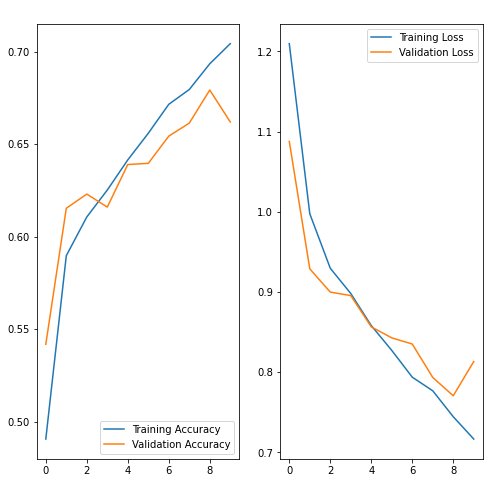

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 10

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(eff_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontdict = {'fontsize': '14',
                              'color': 'white'})

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontdict = {'fontsize': '14',
                              'color': 'white'})
plt.show()

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, None, None, None)  0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 32)    0         
_________________________________________________________________
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               44302464  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 44,304,005
Trainable params: 44,304,005
Non-trainable params: 0
____________________________________________

In [33]:
results_age = model.evaluate(test_data)
print("test loss, test acc:", results_age)

62/62 [==============================] - 11s 180ms/step - loss: 0.8534 - accuracy: 0.6524
test loss, test acc: [0.8533686995506287, 0.6523517370223999]


# Data Preprocessing for gender detection model

In [34]:
df_data = df.images
y2_data = df.gender
X_train, X_test, y_train, y_test = train_test_split(df_data, y2_data, test_size=0.2)

In [35]:
d = {'images':X_train,'gender':y_train}
df_train2 = pd.concat(d,axis=1)
df_train2.images

8254    ../input/utkface-new/crop_part1/9_0_0_20170110...
4414    ../input/utkface-new/crop_part1/24_1_3_2017010...
5419    ../input/utkface-new/crop_part1/9_0_0_20170110...
7263    ../input/utkface-new/crop_part1/24_1_0_2017010...
9270    ../input/utkface-new/crop_part1/1_0_2_20161219...
                              ...                        
5381    ../input/utkface-new/crop_part1/32_1_0_2017010...
793     ../input/utkface-new/crop_part1/1_0_2_20161219...
3861    ../input/utkface-new/crop_part1/24_0_4_2017010...
8028    ../input/utkface-new/crop_part1/2_0_2_20161219...
525     ../input/utkface-new/crop_part1/78_0_0_2017011...
Name: images, Length: 7824, dtype: object

In [36]:
df_data = df_train2.images
y2_data = df_train2.gender
X_train, X_val, y_train, y_val = train_test_split(df_data, y2_data, test_size=0.2)

In [37]:
d = {'images':X_train,'gender':y_train}
train = pd.concat(d,axis=1)
train

images  gender
6807  ../input/utkface-new/crop_part1/12_0_4_2017010...    male
7566  ../input/utkface-new/crop_part1/65_1_0_2017011...  female
1288  ../input/utkface-new/crop_part1/3_0_0_20161219...    male
7570  ../input/utkface-new/crop_part1/11_0_0_2017011...    male
9387  ../input/utkface-new/crop_part1/21_1_2_2017010...  female
...                                                 ...     ...
4596  ../input/utkface-new/crop_part1/9_0_0_20170110...    male
2062  ../input/utkface-new/crop_part1/1_1_3_20161220...  female
6362  ../input/utkface-new/crop_part1/1_0_0_20161219...    male
3843  ../input/utkface-new/crop_part1/18_1_2_2017010...  female
8977  ../input/utkface-new/crop_part1/1_1_3_20161220...  female

[6259 rows x 2 columns]

In [38]:
d = {'images':X_val,'gender':y_val}
val = pd.concat(d,axis=1)
val

images  gender
1764  ../input/utkface-new/crop_part1/56_0_0_2017010...    male
1492  ../input/utkface-new/crop_part1/57_0_0_2017010...    male
6969  ../input/utkface-new/crop_part1/85_1_1_2017011...  female
2834  ../input/utkface-new/crop_part1/16_0_0_2017011...    male
210   ../input/utkface-new/crop_part1/1_1_0_20170109...  female
...                                                 ...     ...
1413  ../input/utkface-new/crop_part1/17_0_0_2017011...    male
3291  ../input/utkface-new/crop_part1/58_1_0_2017010...  female
5509  ../input/utkface-new/crop_part1/9_0_0_20170110...    male
505   ../input/utkface-new/crop_part1/8_0_4_20170103...    male
7295  ../input/utkface-new/crop_part1/2_1_2_20161219...  female

[1565 rows x 2 columns]

In [39]:
d = {'images':X_test,'gender':y_test}
df_test = pd.concat(d,axis=1)
df_test

images  gender
1275  ../input/utkface-new/crop_part1/8_0_0_20170110...    male
5489  ../input/utkface-new/crop_part1/26_0_4_2017010...    male
8943  ../input/utkface-new/crop_part1/24_1_3_2017010...  female
5926  ../input/utkface-new/crop_part1/23_1_1_2017010...  female
3204  ../input/utkface-new/crop_part1/5_0_0_20170110...    male
...                                                 ...     ...
5679  ../input/utkface-new/crop_part1/4_0_0_20170110...    male
4509  ../input/utkface-new/crop_part1/47_0_0_2017010...    male
1250  ../input/utkface-new/crop_part1/2_0_0_20170110...    male
236   ../input/utkface-new/crop_part1/31_1_4_2017010...  female
4155  ../input/utkface-new/crop_part1/2_0_3_20161219...    male

[1956 rows x 2 columns]

In [40]:
train_data = train_gen.flow_from_dataframe(dataframe = train, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'gender', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="categorical",
                                           target_size = (img_height,img_width))

test_data = test_gen.flow_from_dataframe(dataframe = df_test,
                                         #directory = test_folder,
                                         x_col = 'images',
                                         y_col = 'gender',
                                         batch_size = batch,
                                         shuffle = True,
                                         class_mode='categorical',
                                         target_size = (img_height,img_width))

val_data = train_gen.flow_from_dataframe(dataframe = val, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'gender', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="categorical",
                                           target_size = (img_height,img_width))

Found 6259 validated image filenames belonging to 2 classes.
Found 1956 validated image filenames belonging to 2 classes.
Found 1565 validated image filenames belonging to 2 classes.


# Gender Detection Model

In [41]:
num_classes = 2

model2 = tf.keras.Sequential([
  normalization_layer,
  conv_layer_64,
  max_pool,
  conv_layer_64,
  max_pool,
  conv_layer_64,
  max_pool,
  #
  conv_layer_64,
  max_pool,
  conv_layer_64,
  max_pool,
  conv_layer_64,
  max_pool,
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  #layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [42]:
model2.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [43]:
history = model2.fit(
    train_data,
    validation_data=val_data,
    epochs= 10,
    callbacks = callback,
    shuffle=False
)
eff_epochs = len(history.history['loss'])

Epoch 1/10
196/196 [==============================] - 16s 81ms/step - loss: 0.6584 - accuracy: 0.5896 - val_loss: 0.5898 - val_accuracy: 0.6843
Epoch 2/10
196/196 [==============================] - 16s 80ms/step - loss: 0.5882 - accuracy: 0.6722 - val_loss: 0.5334 - val_accuracy: 0.7419
Epoch 3/10
196/196 [==============================] - 15s 75ms/step - loss: 0.5092 - accuracy: 0.7374 - val_loss: 0.4893 - val_accuracy: 0.7578
Epoch 4/10
196/196 [==============================] - 15s 79ms/step - loss: 0.4934 - accuracy: 0.7538 - val_loss: 0.4952 - val_accuracy: 0.7604
Epoch 5/10
196/196 [==============================] - 16s 79ms/step - loss: 0.4617 - accuracy: 0.7735 - val_loss: 0.5268 - val_accuracy: 0.7450
Epoch 6/10
196/196 [==============================] - 17s 85ms/step - loss: 0.4502 - accuracy: 0.7800 - val_loss: 0.4912 - val_accuracy: 0.7617
Epoch 7/10
196/196 [==============================] - 16s 79ms/step - loss: 0.4366 - accuracy: 0.7922 - val_loss: 0.4585 - val_accuracy:

In [44]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, None, None, None)  0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               88604800  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 88,606,850
Trainable params: 88,606,850
Non-trainable params: 0
__________________________________________

In [45]:
results_gender = model2.evaluate(test_data)
print("test loss, test acc:", results_gender)

62/62 [==============================] - 4s 60ms/step - loss: 0.4284 - accuracy: 0.7914
test loss, test acc: [0.42839279770851135, 0.7914110422134399]


# Using the CKPlus dataset for emotion detection

In [46]:
path_ck= '../input/ckplus/CK+48/'

path_ck = pathlib.Path(path_ck)
print(path_ck)
print(len(str(path_ck)))

#Images in this dataset are saved as .png
image_count = len(list(path_ck.glob('*/*.png')))
print(image_count)

../input/ckplus/CK+48
21
981


In [47]:
emotion_class = os.listdir(path_ck)
emotion_class

['surprise', 'fear', 'sadness', 'disgust', 'contempt', 'happy', 'anger']

## Checking the count of images in each class

In [48]:
surprise = len(list(path_ck.glob('surprise/*.png')))
print(surprise)
fear = len(list(path_ck.glob('fear/*.png')))
print(fear)
sadness = len(list(path_ck.glob('sadness/*.png')))
print(sadness)
disgust = len(list(path_ck.glob('disgust/*.png')))
print(disgust)
contempt = len(list(path_ck.glob('contempt/*.png')))
print(contempt)
happy = len(list(path_ck.glob('happy/*.png')))
print(happy)
anger = len(list(path_ck.glob('anger/*.png')))
print(anger)

249
75
84
177
54
207
135


In [49]:
emotion_df = pd.DataFrame(columns=['images','emotion'])
for label in emotion_class:
    for image in list(path_ck.glob(label+'/*.png')):
        df2 = {'images':str(image),'emotion':label}
        emotion_df = emotion_df.append(df2,ignore_index=True)
emotion_df

images   emotion
0    ../input/ckplus/CK+48/surprise/S071_001_000000...  surprise
1    ../input/ckplus/CK+48/surprise/S082_001_000000...  surprise
2    ../input/ckplus/CK+48/surprise/S116_001_000000...  surprise
3    ../input/ckplus/CK+48/surprise/S097_001_000000...  surprise
4    ../input/ckplus/CK+48/surprise/S085_003_000000...  surprise
..                                                 ...       ...
976  ../input/ckplus/CK+48/anger/S119_008_00000016.png     anger
977  ../input/ckplus/CK+48/anger/S113_008_00000021.png     anger
978  ../input/ckplus/CK+48/anger/S136_005_00000008.png     anger
979  ../input/ckplus/CK+48/anger/S089_003_00000036.png     anger
980  ../input/ckplus/CK+48/anger/S119_008_00000018.png     anger

[981 rows x 2 columns]

### Shuffling the dataframe

In [50]:
emotion_df = emotion_df.sample(frac=1)
emotion_df

images   emotion
974  ../input/ckplus/CK+48/anger/S129_006_00000008.png     anger
587  ../input/ckplus/CK+48/contempt/S155_002_000000...  contempt
409  ../input/ckplus/CK+48/disgust/S107_005_0000001...   disgust
691  ../input/ckplus/CK+48/happy/S136_006_00000020.png     happy
82   ../input/ckplus/CK+48/surprise/S075_002_000000...  surprise
..                                                 ...       ...
571  ../input/ckplus/CK+48/disgust/S060_005_0000002...   disgust
630  ../input/ckplus/CK+48/contempt/S895_002_000000...  contempt
884  ../input/ckplus/CK+48/anger/S042_004_00000018.png     anger
524  ../input/ckplus/CK+48/disgust/S131_010_0000001...   disgust
976  ../input/ckplus/CK+48/anger/S119_008_00000016.png     anger

[981 rows x 2 columns]

In [51]:
emotion_data = emotion_df.images
y_data = emotion_df.emotion
X_train, X_test, y_train, y_test = train_test_split(emotion_data, y_data, test_size=0.2)

In [52]:
d3 = {'images':X_train,'emotion':y_train}
emotion_train = pd.concat(d3,axis=1)
emotion_train

images   emotion
889  ../input/ckplus/CK+48/anger/S087_007_00000014.png     anger
971  ../input/ckplus/CK+48/anger/S058_005_00000008.png     anger
408  ../input/ckplus/CK+48/disgust/S131_010_0000001...   disgust
821  ../input/ckplus/CK+48/happy/S115_008_00000016.png     happy
651  ../input/ckplus/CK+48/happy/S011_006_00000012.png     happy
..                                                 ...       ...
261   ../input/ckplus/CK+48/fear/S068_004_00000008.png      fear
371  ../input/ckplus/CK+48/sadness/S042_002_0000001...   sadness
609  ../input/ckplus/CK+48/contempt/S158_002_000000...  contempt
369  ../input/ckplus/CK+48/sadness/S106_002_0000001...   sadness
299   ../input/ckplus/CK+48/fear/S091_001_00000015.png      fear

[784 rows x 2 columns]

In [53]:
d3 = {'images':X_test,'emotion':y_test}
emotion_test = pd.concat(d3,axis=1)
emotion_test

images   emotion
93   ../input/ckplus/CK+48/surprise/S107_001_000000...  surprise
290   ../input/ckplus/CK+48/fear/S102_003_00000016.png      fear
726  ../input/ckplus/CK+48/happy/S064_003_00000023.png     happy
196  ../input/ckplus/CK+48/surprise/S133_009_000000...  surprise
464  ../input/ckplus/CK+48/disgust/S108_006_0000001...   disgust
..                                                 ...       ...
831  ../input/ckplus/CK+48/happy/S127_004_00000014.png     happy
703  ../input/ckplus/CK+48/happy/S079_004_00000025.png     happy
210  ../input/ckplus/CK+48/surprise/S037_001_000000...  surprise
401  ../input/ckplus/CK+48/sadness/S064_004_0000001...   sadness
770  ../input/ckplus/CK+48/happy/S042_006_00000016.png     happy

[197 rows x 2 columns]

In [54]:
emotion_test['emotion'].value_counts()

surprise    56
happy       44
disgust     29
anger       24
sadness     21
fear        13
contempt    10
Name: emotion, dtype: int64

In [55]:
occurences_test = list(emotion_test['emotion'].value_counts())
tot = sum(occurences_test)
occurences_test = [el/ tot for el in occurences_test]
occurences_test

[0.28426395939086296,
 0.2233502538071066,
 0.14720812182741116,
 0.1218274111675127,
 0.1065989847715736,
 0.06598984771573604,
 0.050761421319796954]

### Splitting the emotion_train again for validation set

In [56]:
emotion_data = emotion_train.images
y_data = emotion_train.emotion
X_train, X_val, y_train, y_val = train_test_split(emotion_data, y_data, test_size=0.2)

In [57]:
d3 = {'images':X_val,'emotion':y_val}
emotion_val = pd.concat(d3,axis=1)
emotion_val

images   emotion
411  ../input/ckplus/CK+48/disgust/S058_006_0000001...   disgust
265   ../input/ckplus/CK+48/fear/S132_003_00000023.png      fear
247  ../input/ckplus/CK+48/surprise/S067_002_000000...  surprise
808  ../input/ckplus/CK+48/happy/S129_012_00000010.png     happy
132  ../input/ckplus/CK+48/surprise/S115_001_000000...  surprise
..                                                 ...       ...
623  ../input/ckplus/CK+48/contempt/S157_002_000000...  contempt
344  ../input/ckplus/CK+48/sadness/S108_005_0000002...   sadness
10   ../input/ckplus/CK+48/surprise/S126_004_000000...  surprise
59   ../input/ckplus/CK+48/surprise/S061_001_000000...  surprise
442  ../input/ckplus/CK+48/disgust/S106_004_0000000...   disgust

[157 rows x 2 columns]

In [58]:
emotion_val['emotion'].value_counts()

surprise    37
disgust     30
happy       28
anger       25
sadness     17
fear        10
contempt    10
Name: emotion, dtype: int64

In [59]:
occurences_val = list(emotion_val['emotion'].value_counts())
tot = sum(occurences_val)
occurences_val = [el/ tot for el in occurences_val]
occurences_val

[0.2356687898089172,
 0.1910828025477707,
 0.17834394904458598,
 0.1592356687898089,
 0.10828025477707007,
 0.06369426751592357,
 0.06369426751592357]

In [60]:
d3 = {'images':X_train,'emotion':y_train}
emotion_train = pd.concat(d3,axis=1)
emotion_train

images   emotion
398  ../input/ckplus/CK+48/sadness/S081_002_0000002...   sadness
844  ../input/ckplus/CK+48/happy/S089_002_00000021.png     happy
775  ../input/ckplus/CK+48/happy/S076_006_00000017.png     happy
358  ../input/ckplus/CK+48/sadness/S115_004_0000001...   sadness
342  ../input/ckplus/CK+48/sadness/S113_003_0000001...   sadness
..                                                 ...       ...
599  ../input/ckplus/CK+48/contempt/S158_002_000000...  contempt
102  ../input/ckplus/CK+48/surprise/S011_001_000000...  surprise
435  ../input/ckplus/CK+48/disgust/S111_007_0000001...   disgust
303   ../input/ckplus/CK+48/fear/S506_004_00000036.png      fear
349  ../input/ckplus/CK+48/sadness/S501_006_0000004...   sadness

[627 rows x 2 columns]

In [61]:
emotion_train['emotion'].value_counts()

surprise    156
happy       135
disgust     118
anger        86
fear         52
sadness      46
contempt     34
Name: emotion, dtype: int64

In [62]:
occurences_train = list(emotion_train['emotion'].value_counts())
tot = sum(occurences_train)
occurences_train = [el/ tot for el in occurences_train]
occurences_train

[0.24880382775119617,
 0.215311004784689,
 0.18819776714513556,
 0.1371610845295056,
 0.08293460925039872,
 0.0733652312599681,
 0.05422647527910686]

In [63]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale = 1./255)

In [64]:
train = train_gen.flow_from_dataframe(dataframe = emotion_train, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'emotion', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="sparse",
                                           target_size = (img_height,img_width))

test = test_gen.flow_from_dataframe(dataframe = emotion_test,
                                         #directory = test_folder,
                                         x_col = 'images',
                                         y_col = 'emotion',
                                         batch_size = batch,
                                         shuffle = True,
                                         class_mode='sparse',
                                         target_size = (img_height,img_width))

val = train_gen.flow_from_dataframe(dataframe = emotion_val, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'emotion', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="sparse",
                                           target_size = (img_height,img_width))

Found 627 validated image filenames belonging to 7 classes.
Found 197 validated image filenames belonging to 7 classes.
Found 157 validated image filenames belonging to 7 classes.


# Emotion Detection Model

In [65]:
num_classes = 7

model3 = tf.keras.Sequential([
  normalization_layer,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [66]:
model3.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [67]:
history = model3.fit(
    train,
    validation_data=val,
    epochs= 10,
    callbacks = callback,
    shuffle=False
)
eff_epochs = len(history.history['loss'])

Epoch 1/10
20/20 [==============================] - 4s 214ms/step - loss: 1.7713 - accuracy: 0.2932 - val_loss: 1.4876 - val_accuracy: 0.5287
Epoch 2/10
20/20 [==============================] - 1s 59ms/step - loss: 1.2749 - accuracy: 0.6208 - val_loss: 1.0859 - val_accuracy: 0.7325
Epoch 3/10
20/20 [==============================] - 1s 59ms/step - loss: 0.8505 - accuracy: 0.7426 - val_loss: 0.8648 - val_accuracy: 0.7134
Epoch 4/10
20/20 [==============================] - 1s 69ms/step - loss: 0.7013 - accuracy: 0.7870 - val_loss: 0.8825 - val_accuracy: 0.6688
Epoch 5/10
20/20 [==============================] - 1s 58ms/step - loss: 0.5651 - accuracy: 0.8201 - val_loss: 0.7760 - val_accuracy: 0.7134


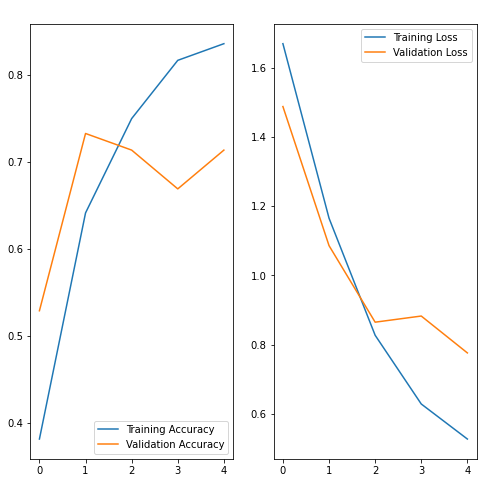

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 10

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(eff_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontdict = {'fontsize': '14',
                              'color': 'white'})

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontdict = {'fontsize': '14',
                              'color': 'white'})
plt.show()

In [69]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, None, None, None)  0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten_2 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               44302464  
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 903       
Total params: 44,304,263
Trainable params: 44,304,263
Non-trainable params: 0
__________________________________________

In [70]:
results_emotion = model3.evaluate(test)
print("test loss, test acc:", results_emotion)

7/7 [==============================] - 1s 143ms/step - loss: 0.6877 - accuracy: 0.7259
test loss, test acc: [0.6876634955406189, 0.7258883118629456]


# Predicting on new data

In [71]:
# picture_url = ""
# pic_path = tf.keras.utils.get_file('', origin=picture_url)

from PIL import Image

pic_path = "/kaggle/input/tesssss/20150524153906-1-waria-indonesia-001-nfi.jpg"

# Membuka gambar menggunakan PIL
image = Image.open(pic_path)

# Menampilkan gambar
image.show()

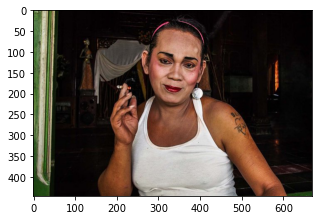

In [72]:
plt.figure(figsize=(5,5))
img = PIL.Image.open(pic_path)
plt.imshow(img)

In [73]:
img = tf.keras.preprocessing.image.load_img(
    pic_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [74]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(age_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 0-20 with a 100.00 percent confidence.


In [75]:
gender_class = ['male','female']
predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(gender_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to male with a 100.00 percent confidence.


In [76]:
predictions = model3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(emotion_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to contempt with a 99.97 percent confidence.


### Second Example

In [77]:
pic_path = "/kaggle/input/baruuu0/WhatsApp Image 2023-12-28 at 11.57.35_dab9ce3d.jpg"

# Membuka gambar menggunakan PIL
image = Image.open(pic_path)

# Menampilkan gambar
image.show()

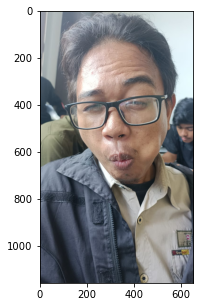

In [78]:
plt.figure(figsize=(5,5))
img = PIL.Image.open(pic_path)
plt.imshow(img)

In [79]:
img = tf.keras.preprocessing.image.load_img(
    pic_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [80]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(age_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 81-116 with a 100.00 percent confidence.


In [81]:
gender_class = ['male','female']
predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(gender_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to male with a 100.00 percent confidence.


In [82]:
predictions = model3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(emotion_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to fear with a 100.00 percent confidence.
